# Reaction flux fit

In [2]:
import alloregfit as arf
import pandas as pd
import cobra
import numpy as np

Load data and model:

In [3]:
data_dir = "//imsbnas.ethz.ch/Sauer1/users/Xavier/10_Karl_FVA/"
results = pd.read_pickle(data_dir+"results_all.pickle")
#met_sd = pd.read_excel(data_dir+"metabolites.xlsx",sheetname=1,index_col="name")
reg_coli = pd.read_csv(data_dir+"SMRN.csv",index_col="rxn_id")
gold = pd.read_csv(data_dir+"gold_standard.csv",index_col="reaction")

cond = ['glc-NCM3722_1','glc-NQ1243_3','glc-NQ1243_4','glc-NQ1243_5','glu-NCM3722_9','glu-NQ393_11','glu-NQ393_12','glu-NQ393_13','glu-NQ393_14']
data_dir = '//imsbnas.ethz.ch/Sauer1/users/Xavier/3_Karl_data/'
model = cobra.io.load_matlab_model(data_dir+"iJO1366.mat")
fluxes = pd.read_excel(data_dir+"fluxes_FVA.xlsx",sheet_name=['min','max'],index_col="name")
fluxes['min'] = fluxes['min'][cond]; fluxes['max'] = fluxes['max'][cond]
metabolites = pd.read_excel(data_dir+"merged_metabolites.xlsx",index_col="name")[cond]
metabolites_sd = pd.read_excel(data_dir+"merged_metabolites_sd.xlsx",index_col="name")[cond]
proteins = pd.read_excel(data_dir+"proteome.xlsx",index_col="name")[cond]
mapping = pd.read_table(data_dir+"ECOLI_83333_idmapping.dat",header=None)
rxn_id = open(data_dir+'reactions_GS2.txt').read().splitlines()
reg_coli = pd.read_csv(data_dir+"SMRN.csv",index_col="rxn_id")
summary = arf.define_reactions(rxn_id,model,fluxes,proteins,metabolites,metab_sd=metabolites_sd)

In [4]:
val_bycond = arf.validate_bycond(results,summary,metabolites)

C:\Users\user\Documents\GitHub\AlloRegFit\alloregfit.py:961 RuntimeWarning: invalid value encountered in true_divide
C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879 RuntimeWarning: invalid value encountered in greater
C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879 RuntimeWarning: invalid value encountered in less
C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821 RuntimeWarning: invalid value encountered in less_equal


Reduce results to the best validates candidates.

In [5]:
reduced = pd.DataFrame(columns=results.columns)
for rxn in list(results['rxn_id'].drop_duplicates()):
    rxn_results = results.loc[results['rxn_id']==rxn]
    rxn_val = val_bycond.loc[val_bycond['rxn_id']==rxn]
    aic_noreg = rxn_val.loc[(rxn_val['regulator']==''),'AIC_weighted'].values[0]
    lik_noreg = rxn_val.loc[(rxn_val['regulator']==''),'lik_weighted'].values[0]
    idx1 = rxn_val.loc[(rxn_val['AIC_weighted']<=aic_noreg),'regulator']
    idx2 = rxn_val.loc[(rxn_val['lik_weighted']>=lik_noreg),'regulator']
    bools1 =[any(i[0] in s for s in idx1) if i!='' else True for i in rxn_results['regulator']]
    bools2 =[any(i[0] in s for s in idx1) if i!='' else True for i in rxn_results['regulator']]
    reduced = reduced.append(rxn_results.loc[bools1 and bools2])
reduced = reduced.sort_values(by='best_lik')
reduced.reset_index(drop=True,inplace=True)
reduced

best_fit    best_lik  \
0               K_amp_c       K_gtp_c           K_eq...  -68.405702   
1               K_atp_c       K_gdp_c          K_eq ...  -68.405702   
2              K_3mob_c    K_ala__L_c          K_eq ...  -68.405091   
3               K_akg_c    K_val__L_c           K_eq...  -68.405091   
4              K_atp_c   K_coa_c    K_succ_c      K_...  -64.095186   
5            K_atp_c     K_r5p_c      K_eq   K_amp_c...  -62.172726   
6             K_r1p_c      K_eq  K_r5p_c  K_cat_deoB...  -62.169798   
7                K_ac_c       K_atp_c      K_eq   K_...  -62.118471   
8               K_3pg_c   K_atp_c      K_eq      K_a...  -23.817351   
9           K_3pg_c   K_atp_c      K_eq       K_adp_...  -22.983442   
10         K_atp_c   K_f6p_c      K_eq       K_adp_c...  -22.573163   
11            K_3pg_c   K_atp_c      K_eq       K_ad...  -22.426417   
12            K_3pg_c   K_atp_c      K_eq   K_adp_c ...  -22.030186   
13             K_3pg_c   K_atp_c      K_eq   K_adp_c...  -21.646598   
14             K_3pg_c   K_atp_c      K_eq     K_adp...  -21.340585   
15             K_3pg_c   K_atp_c      K_eq   K_adp_c...  -20.913078   
16           K_3pg_c   K_atp_c      K_eq   K_adp_c  ...  -20.794108   
17            K_dhap_c     K_cat_tpiA
48  27265.2386...  -20.393835   
18            K_3pg_c   K_atp_c      K_eq   K_adp_c ...  -20.103665   
19           K_3pg_c   K_atp_c      K_eq     K_adp_c...  -20.002210   
20             K_3pg_c   K_atp_c      K_eq   K_adp_c...  -19.765961   
21            K_akg_c  K_gln__L_c  K_nadph_c        ...  -19.187522   
22          K_3pg_c   K_atp_c      K_eq   K_adp_c  K...  -18.955007   
23          K_g6p_c      K_eq       K_f6p_c  K_cat_p...  -18.836274   
24             K_3pg_c   K_atp_c      K_eq   K_adp_c...  -18.246988   
25        K_dhap_c  K_reg_suchms_c  K_cat_tpiA
19   ...  -16.540703   
26        K_dhap_c  K_reg_3crsol_c    K_cat_tpiA
72 ...  -16.231931   
27           K_dhap_c  K_reg_pydx5p_c    K_cat_tpiA
...  -15.743609   
28             K_dhap_c  K_reg_sl2a6o_c     K_cat_tp...  -15.619294   
29          K_dhap_c  K_reg_nadh_c    K_cat_tpiA
39 ...  -15.312143   
...                                                 ...         ...   
1105         K_e4p_c   K_nad_c        K_eq     K_nad...   82.701715   
1106        K_e4p_c       K_nad_c          K_eq   K_...   83.051841   
1107       K_e4p_c      K_nad_c          K_eq    K_n...   83.312533   
1108          K_e4p_c   K_nad_c         K_eq   K_nad...   83.543063   
1109          K_e4p_c   K_nad_c         K_eq   K_nad...   83.683176   
1110       K_e4p_c   K_nad_c          K_eq    K_nadh...   84.658074   
1111         K_e4p_c   K_nad_c          K_eq   K_nad...   85.347261   
1112       K_e4p_c   K_nad_c         K_eq      K_nad...   85.668131   
1113          K_e4p_c   K_nad_c           K_eq     K...   85.800766   
1114        K_e4p_c   K_nad_c           K_eq     K_n...   86.207249   
1115        K_e4p_c   K_nad_c          K_eq     K_na...   86.226258   
1116           K_e4p_c   K_nad_c           K_eq     ...   86.319493   
1117       K_e4p_c   K_nad_c          K_eq     K_nad...   86.365281   
1118           K_e4p_c   K_nad_c          K_eq     K...   86.384323   
1119          K_e4p_c   K_nad_c           K_eq     K...   86.407076   
1120           K_e4p_c  K_nad_c         K_eq      K_...   86.516895   
1121         K_e4p_c   K_nad_c           K_eq  K_nad...   86.941369   
1122           K_e4p_c   K_nad_c          K_eq     K...   87.097616   
1123       K_e4p_c   K_nad_c         K_eq    K_nadh_...   87.138774   
1124      K_e4p_c   K_nad_c          K_eq   K_nadh_c...   87.613932   
1125       K_e4p_c   K_nad_c          K_eq      K_na...   87.680880   
1126       K_e4p_c   K_nad_c           K_eq  K_nadh_...   88.040025   
1127       K_e4p_c   K_nad_c          K_eq     K_nad...   88.156924   
1128        K_e4p_c   K_nad_c           K_eq  K_nadh...   88.351957   
1129       K_4ampm_c   K_atp_c           K_eq       ...   89.219357   


Run alloregfit to obtain the predicted flux estimation:

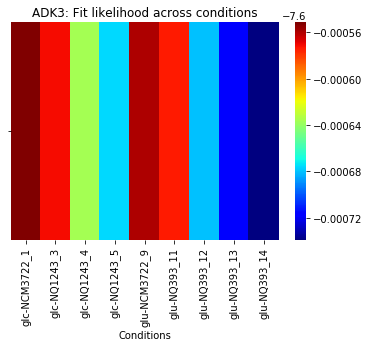

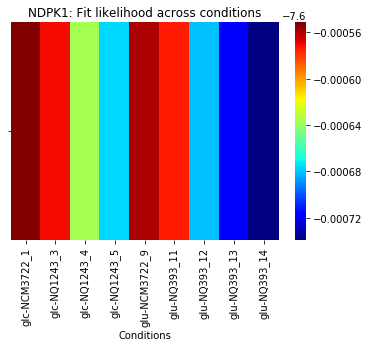

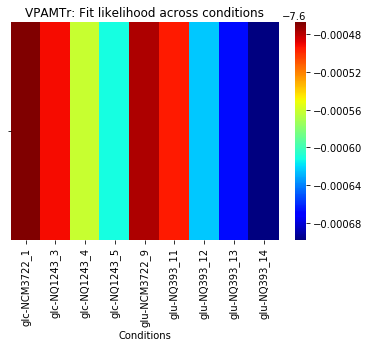

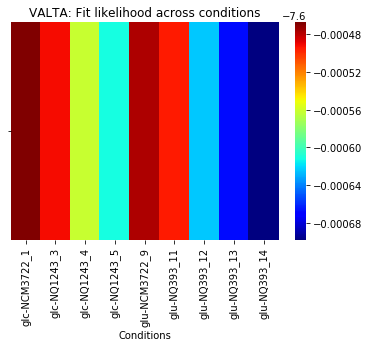

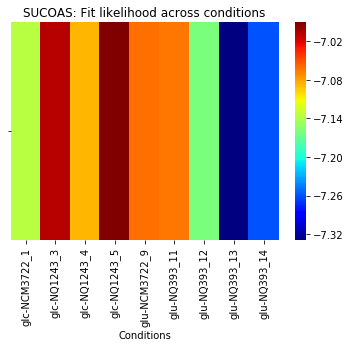

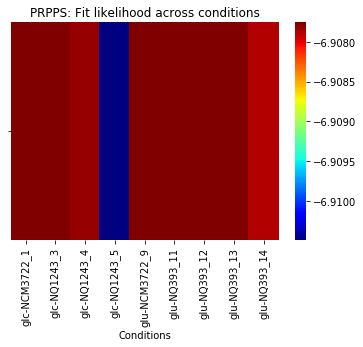

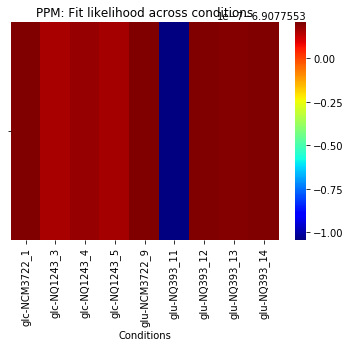

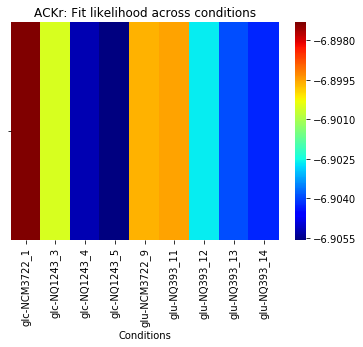

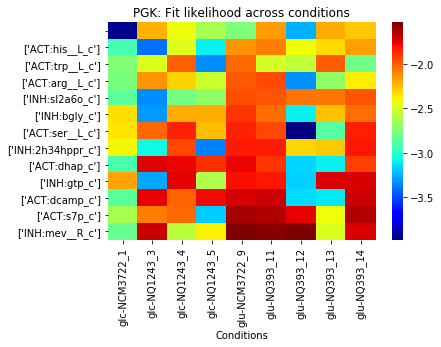

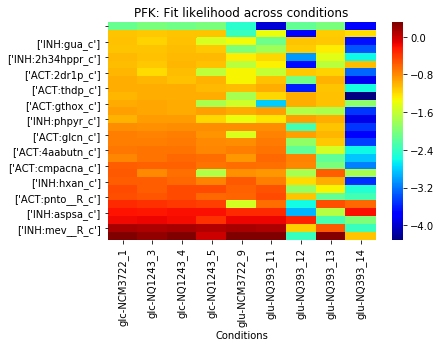

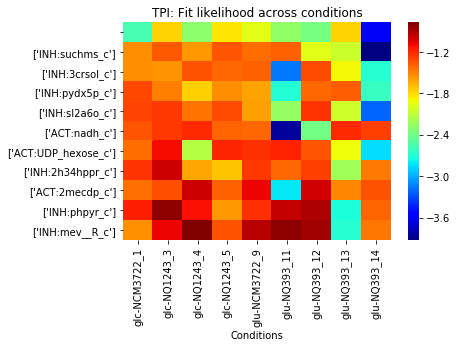

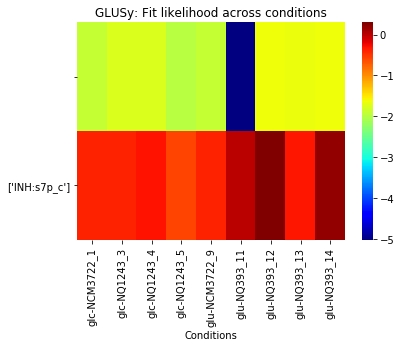

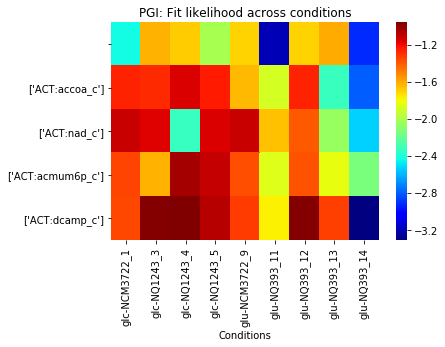

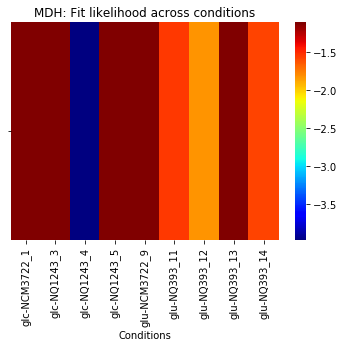

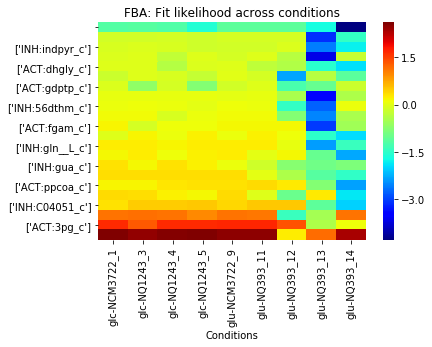

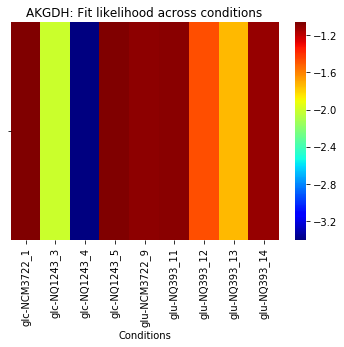

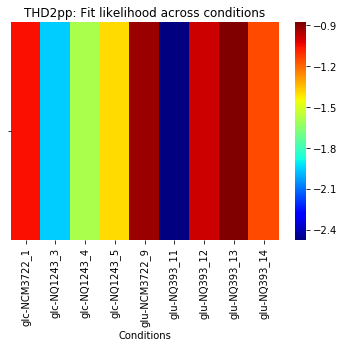

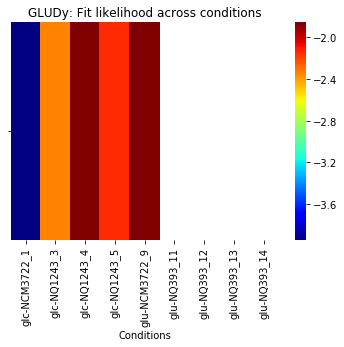

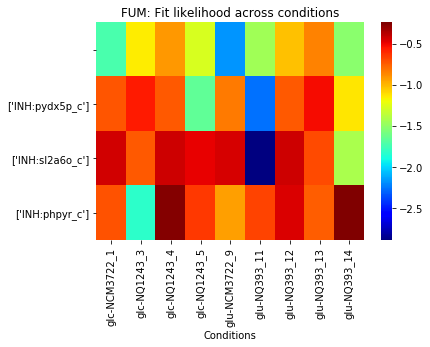

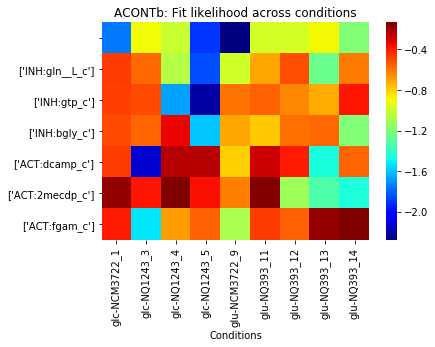

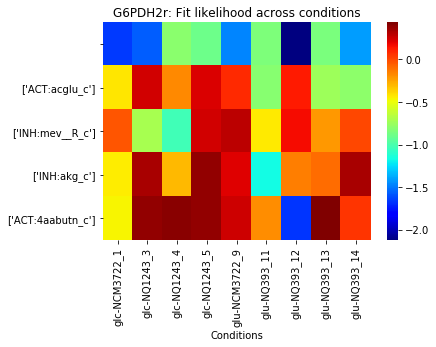

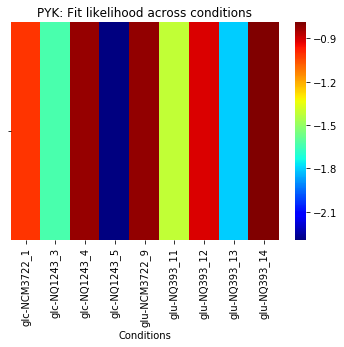

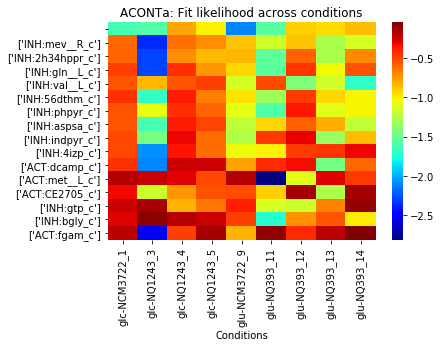

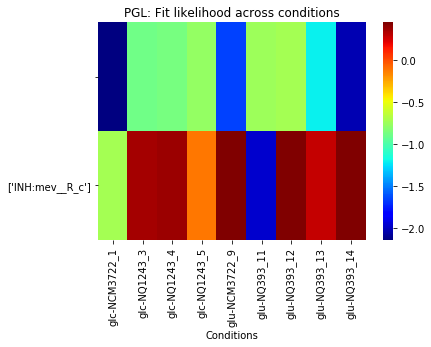

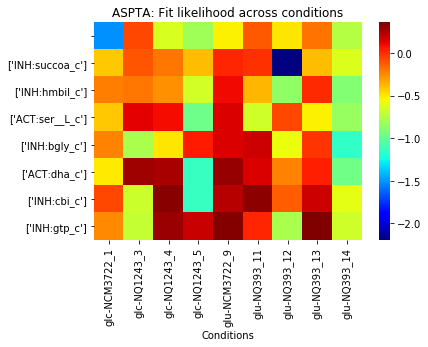

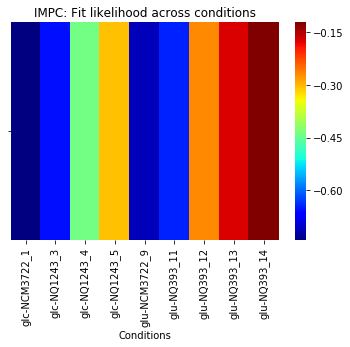

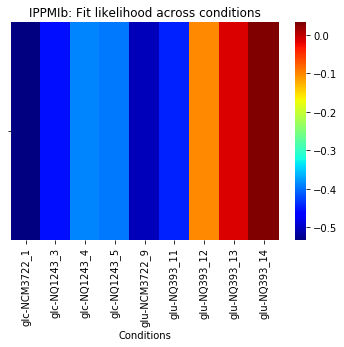

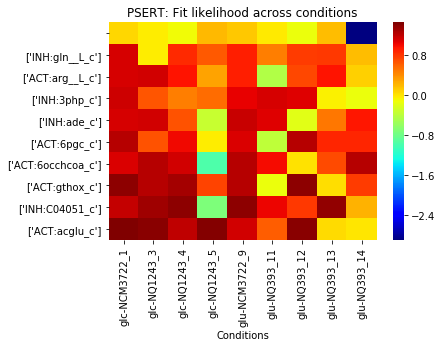

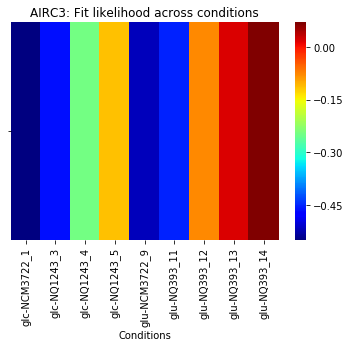

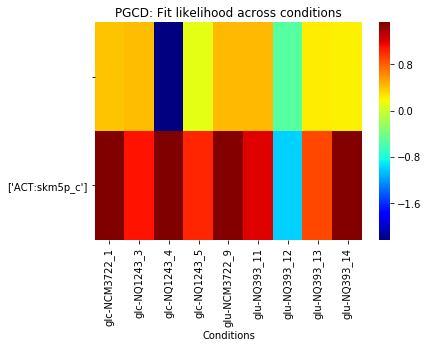

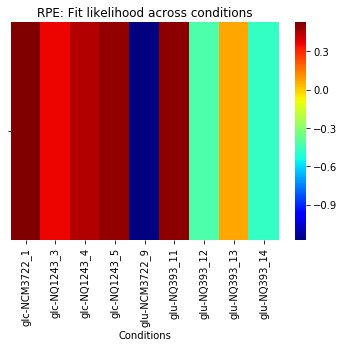

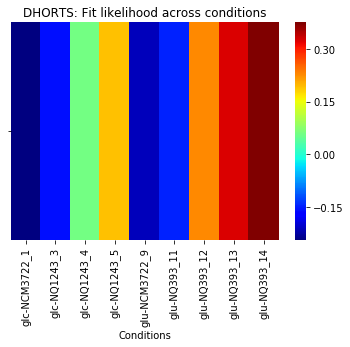

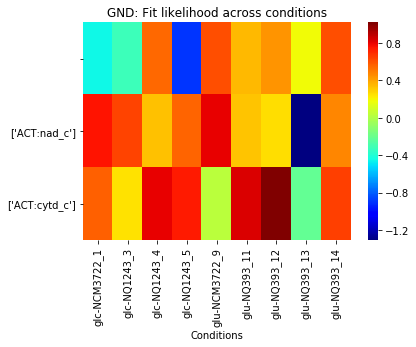

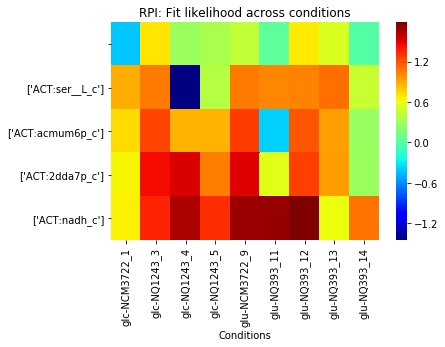

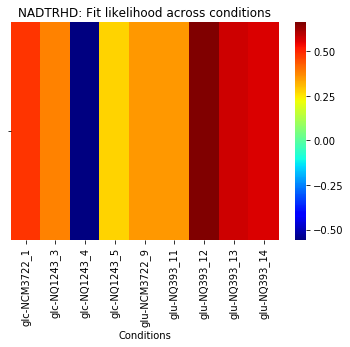

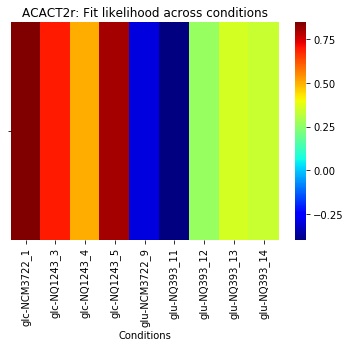

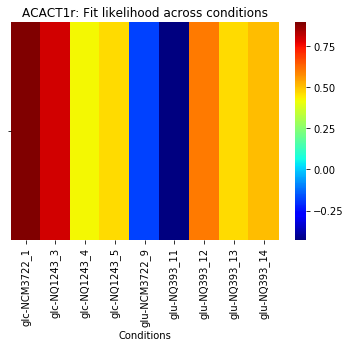

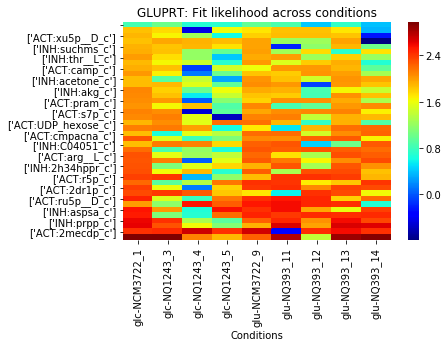

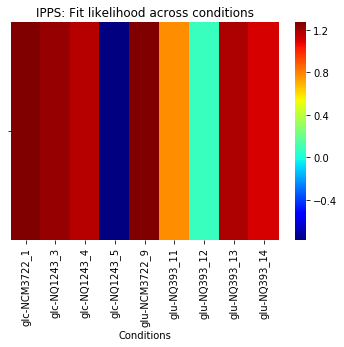

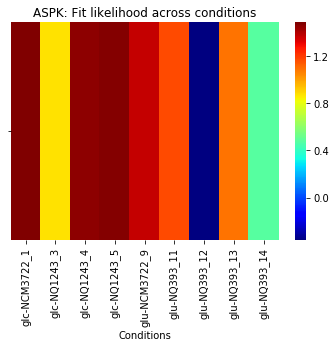

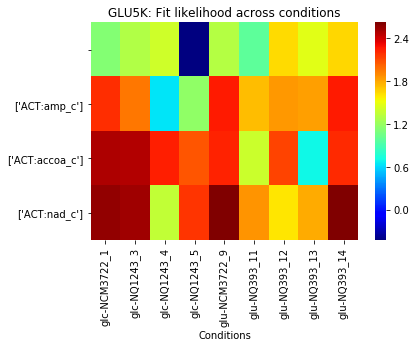

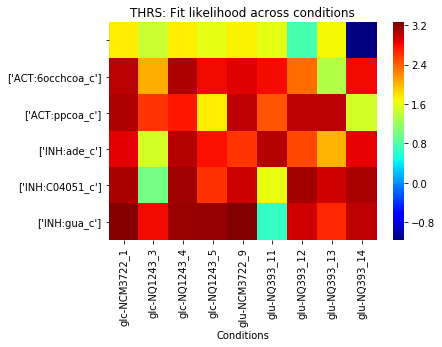

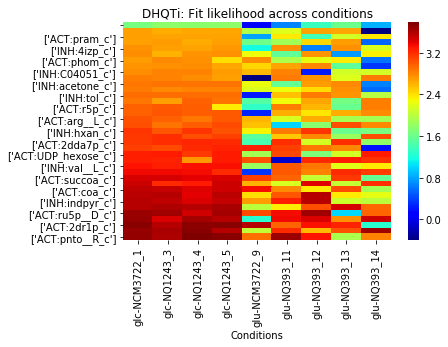

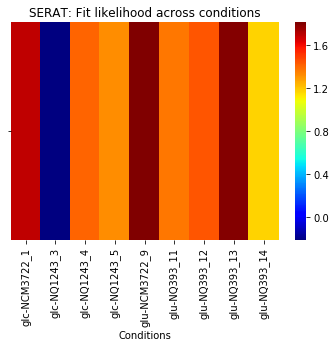

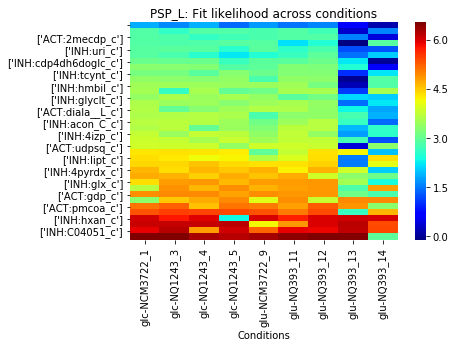

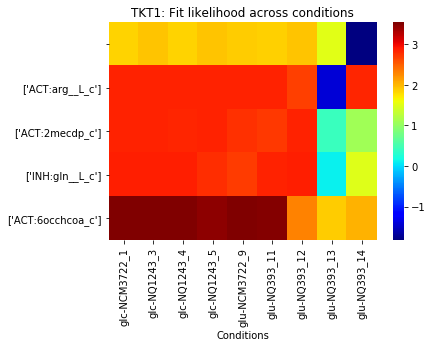

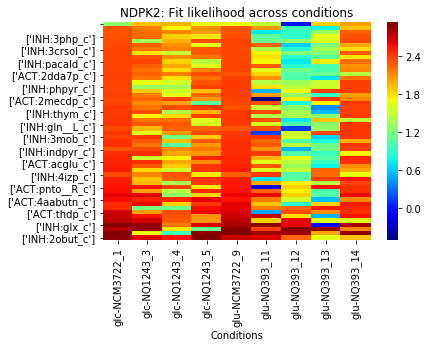

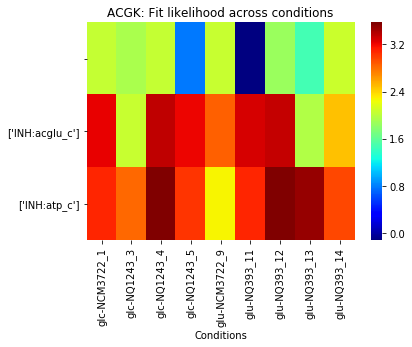

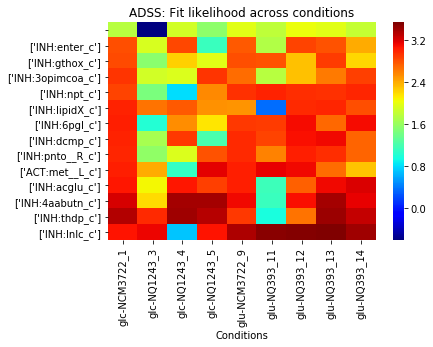

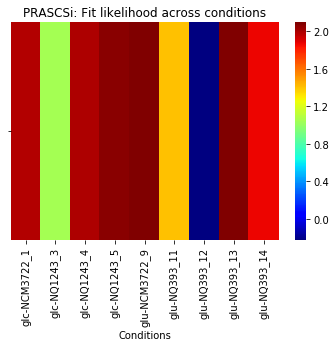

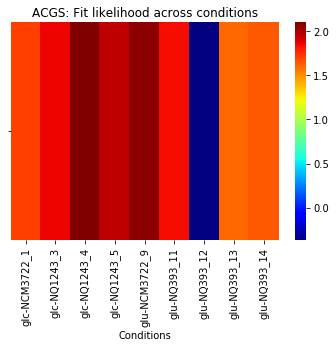

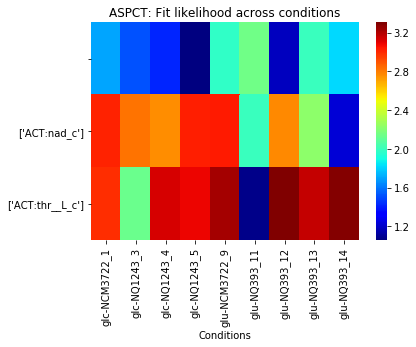

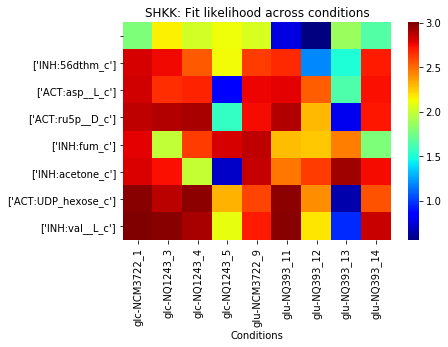

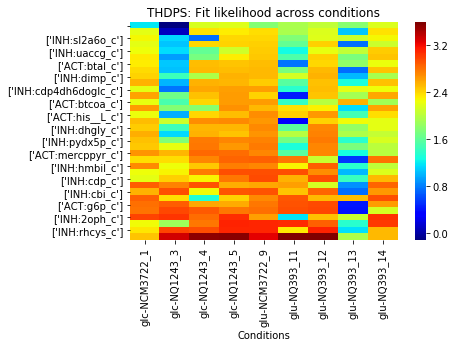

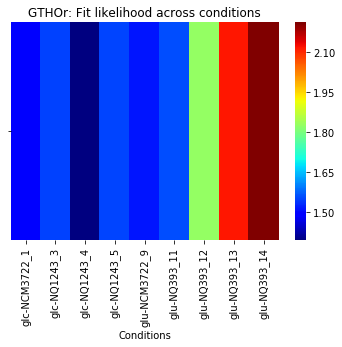

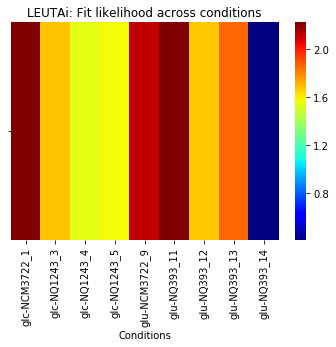

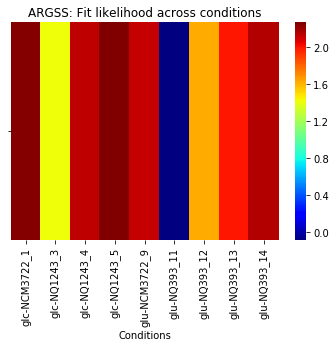

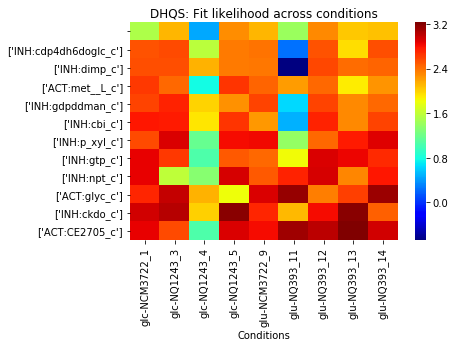

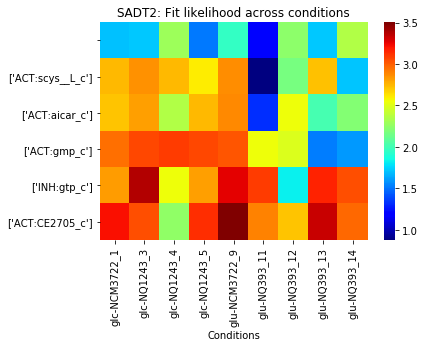

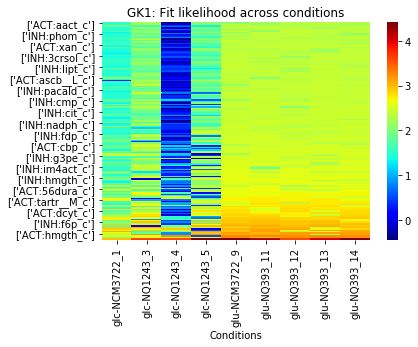

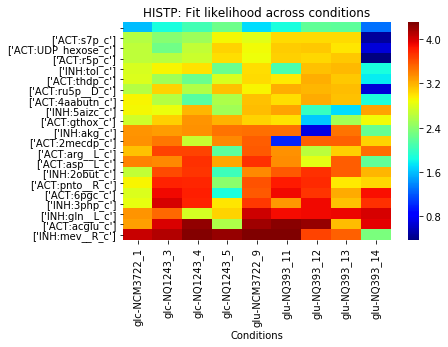

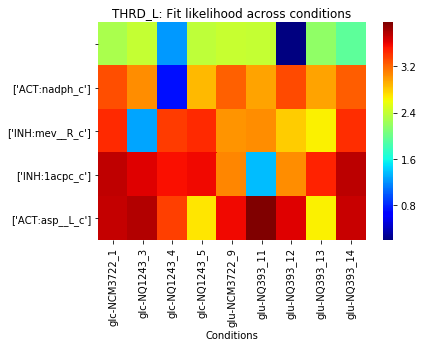

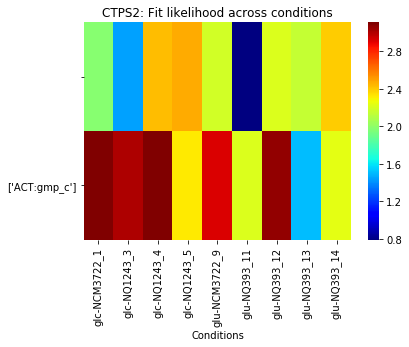

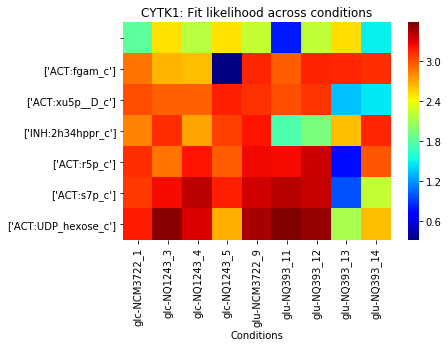

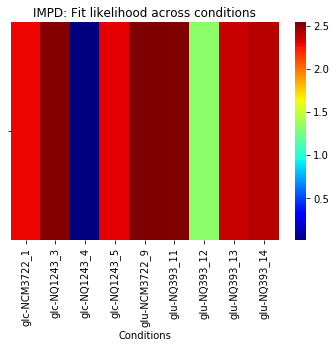

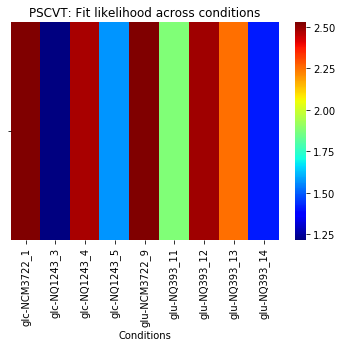

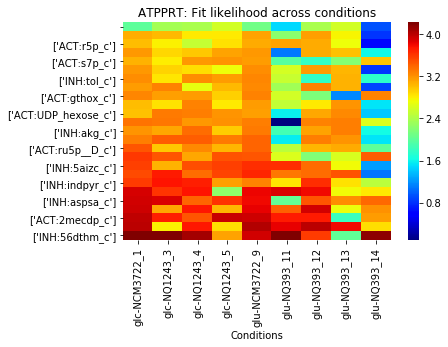

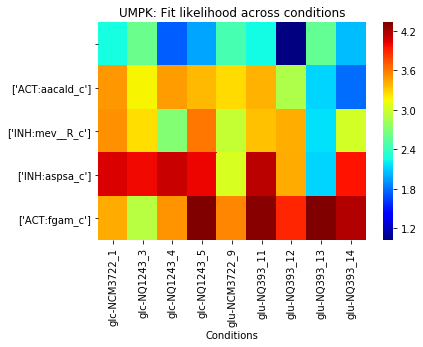

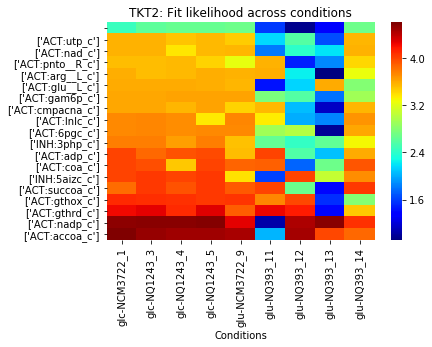

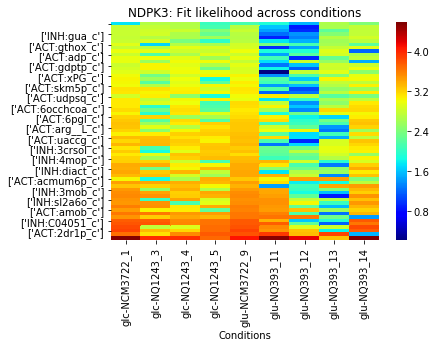

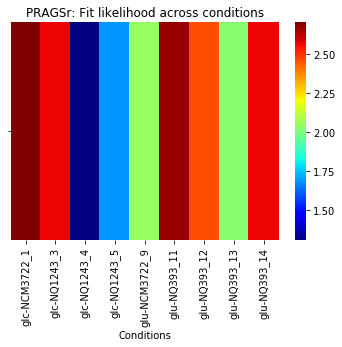

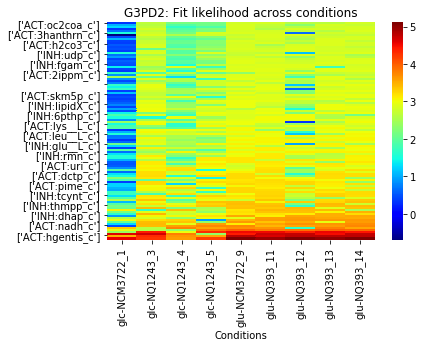

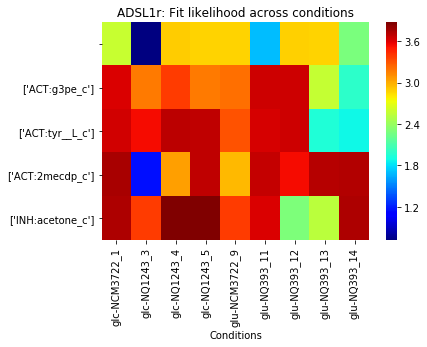

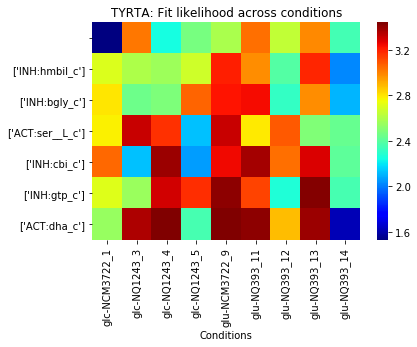

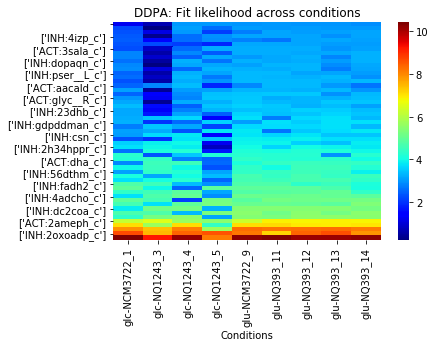

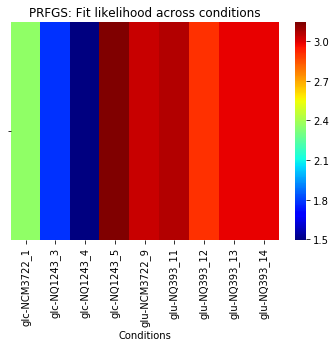

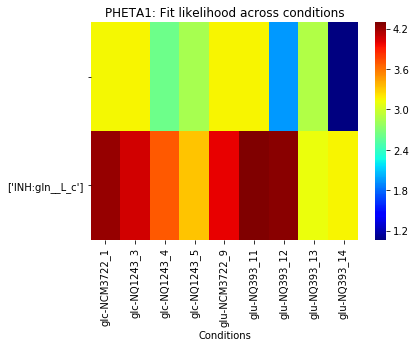

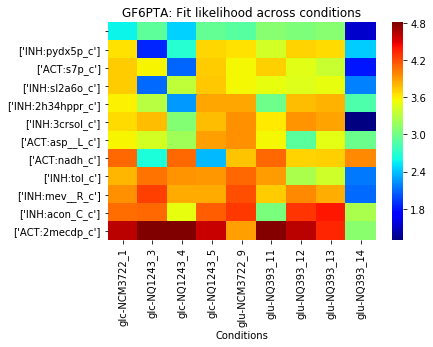

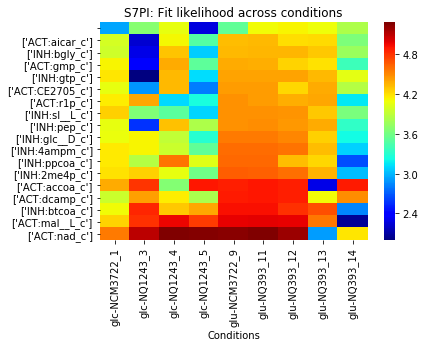

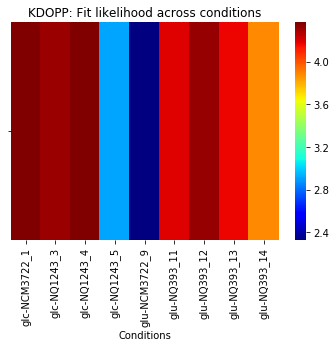

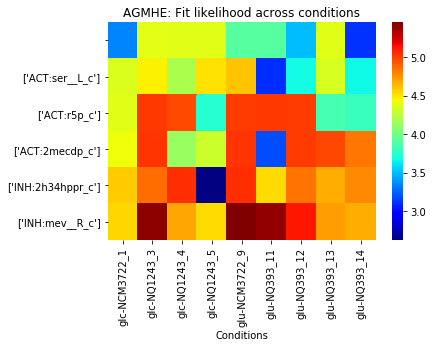

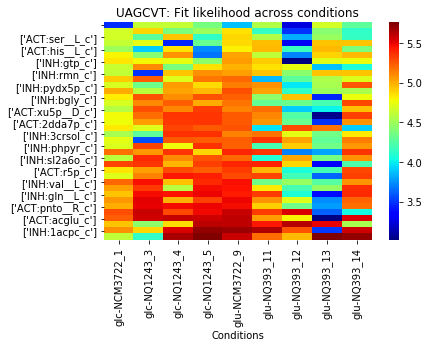

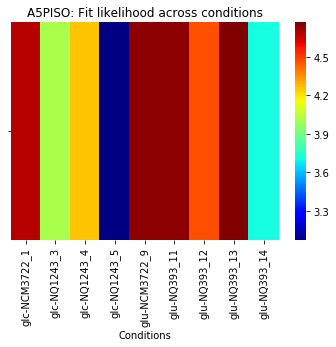

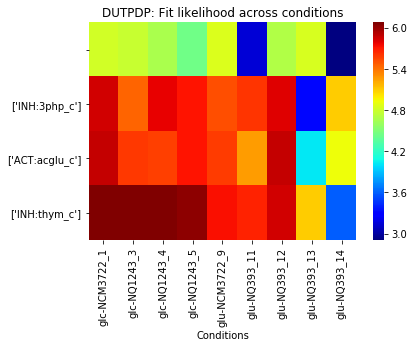

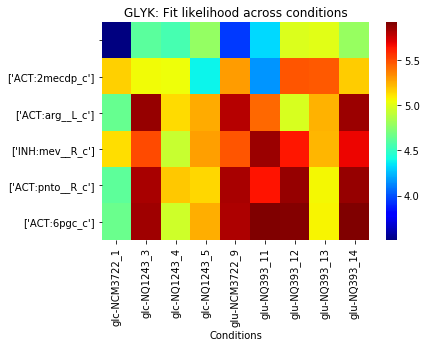

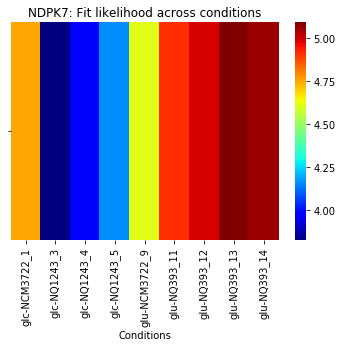

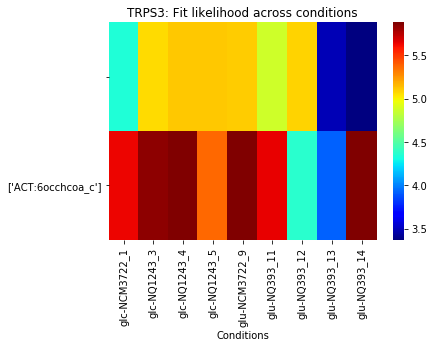

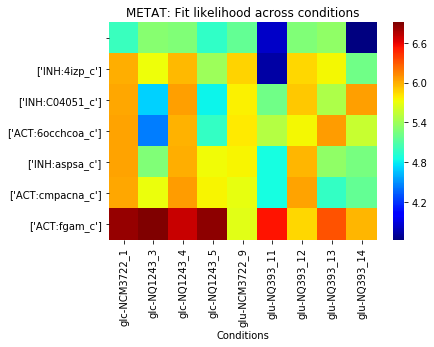

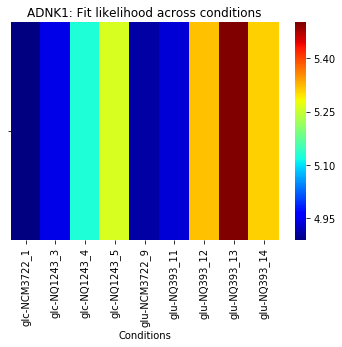

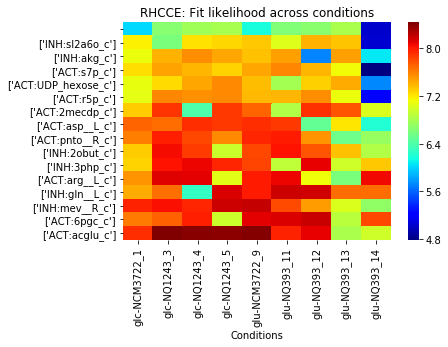

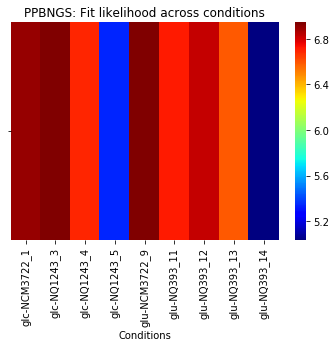

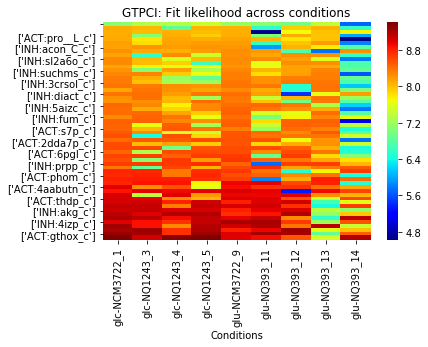

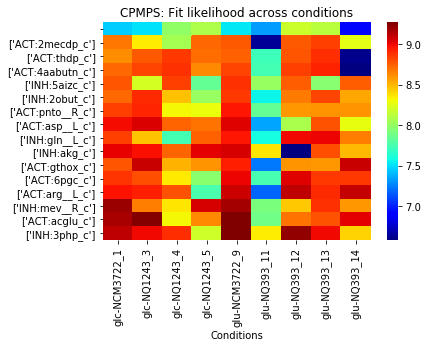

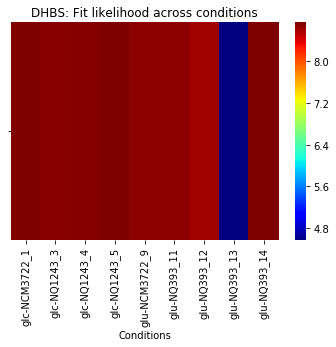

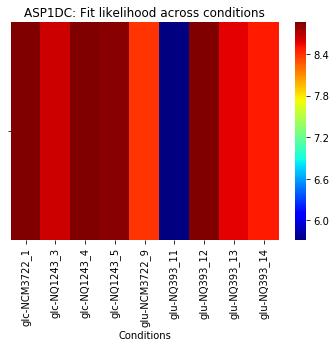

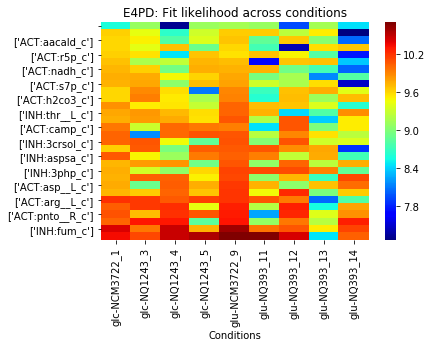

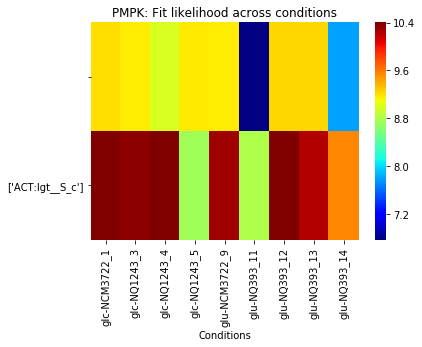

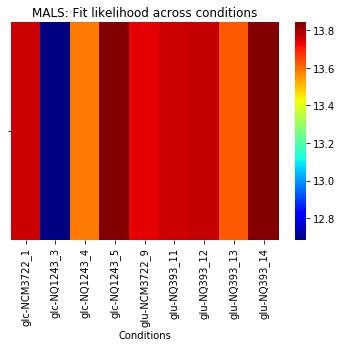

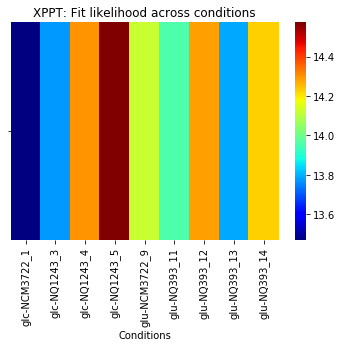

In [6]:
for rxn in list(reduced['rxn_id'].drop_duplicates()):
    arf.heatmap_across_conditions(reduced,rxn)

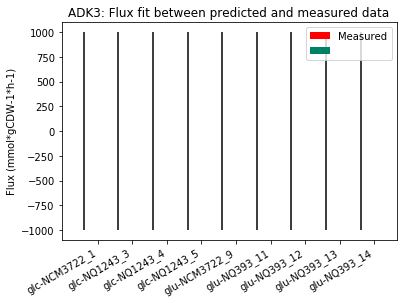

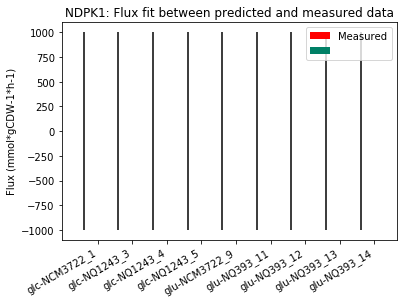

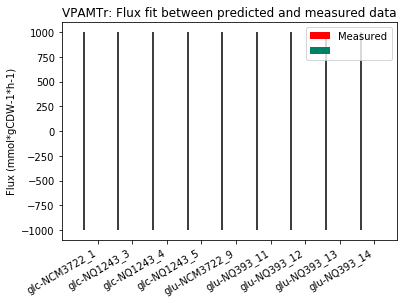

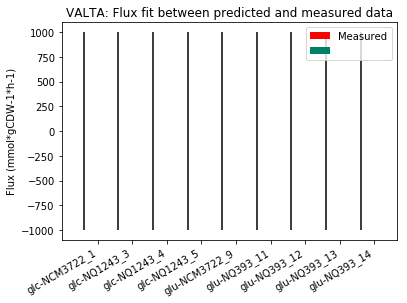

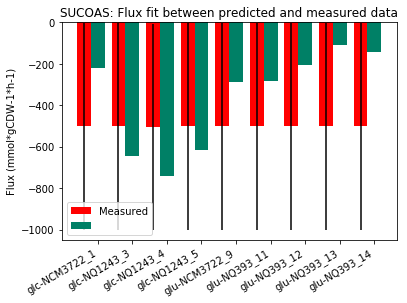

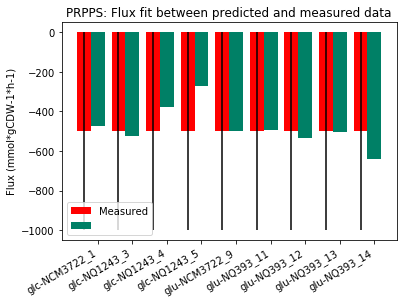

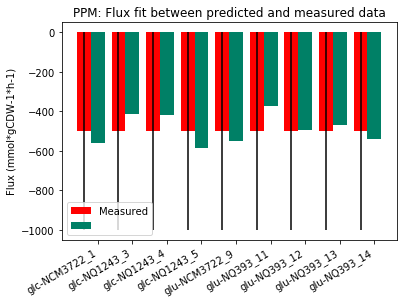

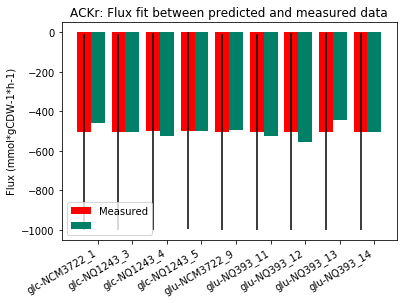

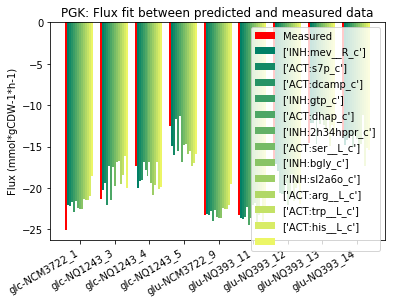

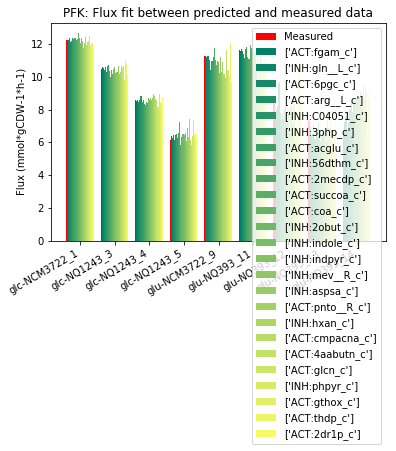

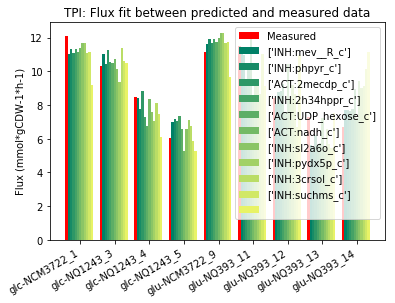

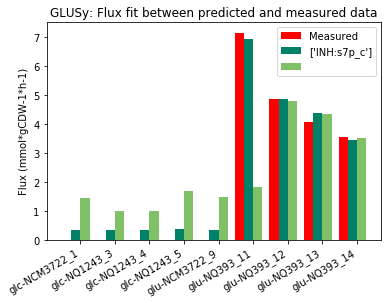

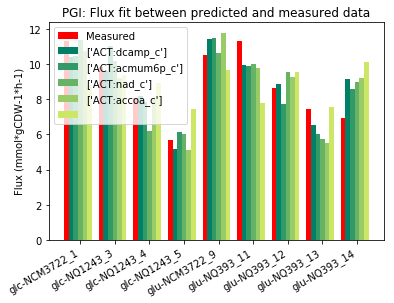

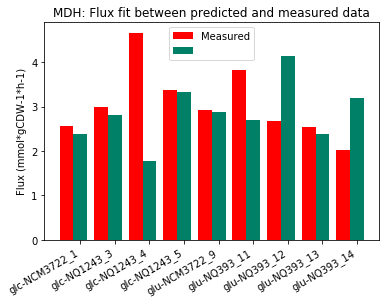

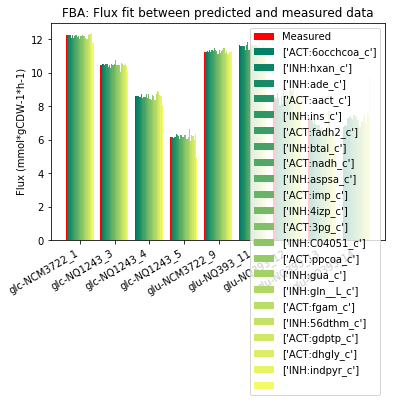

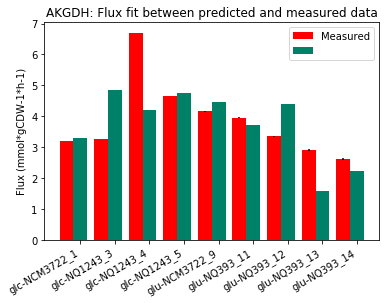

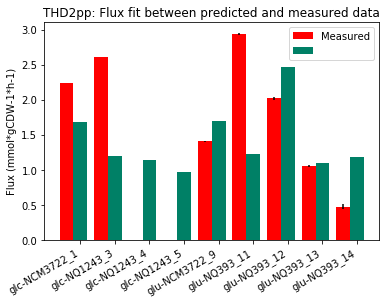

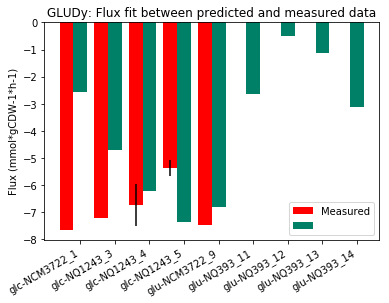

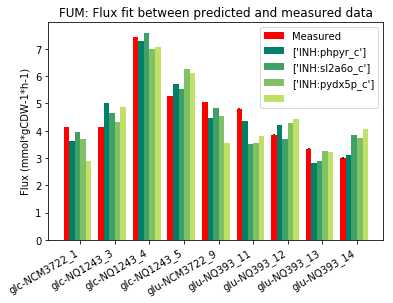

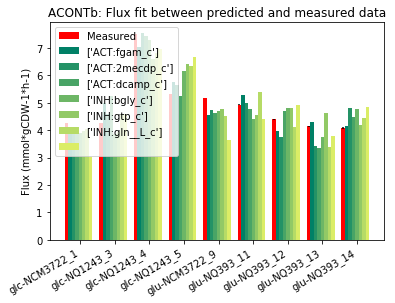

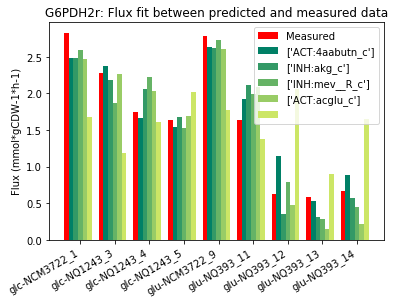

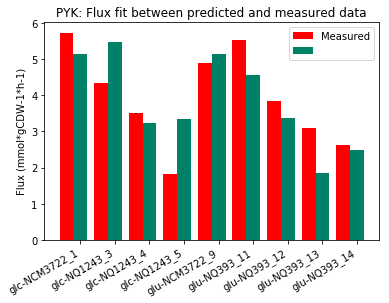

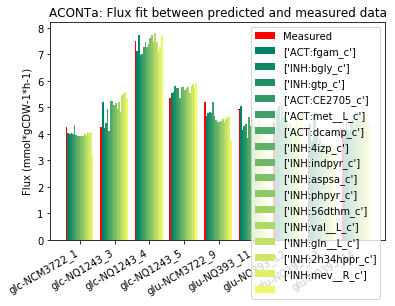

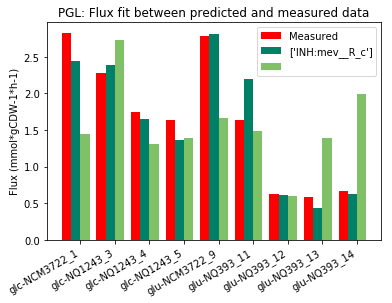

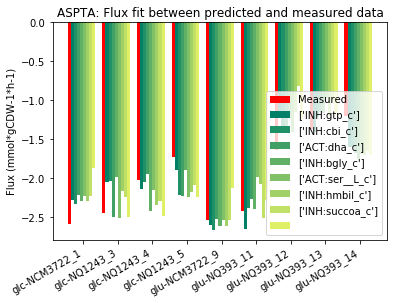

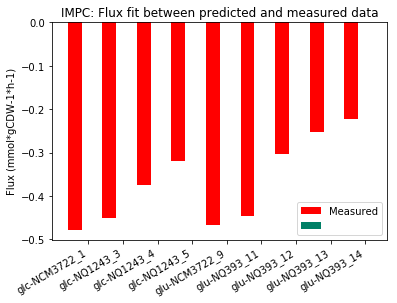

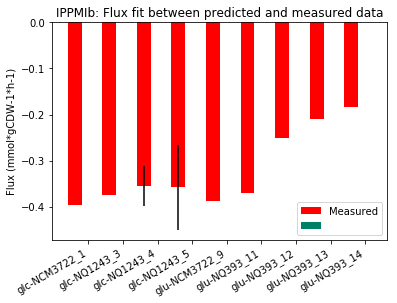

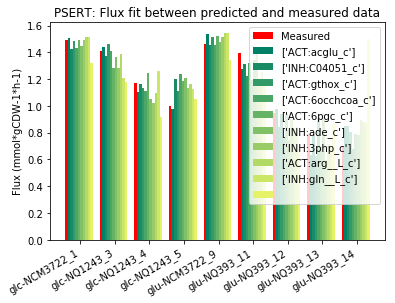

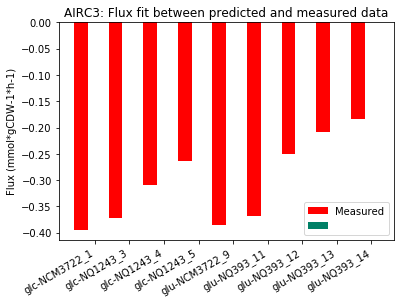

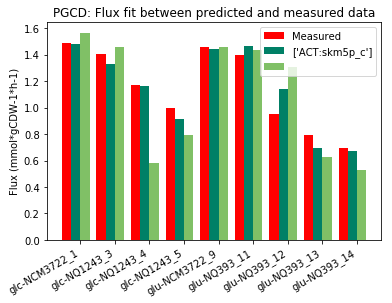

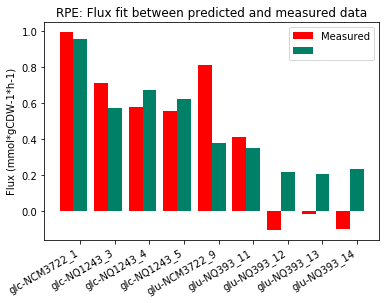

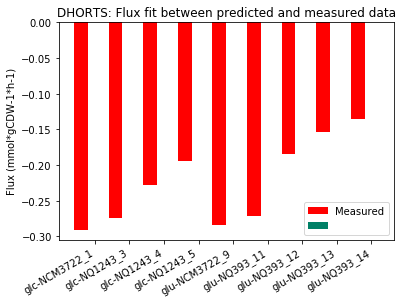

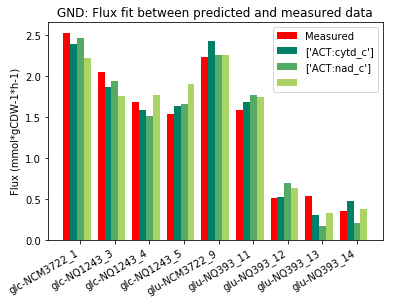

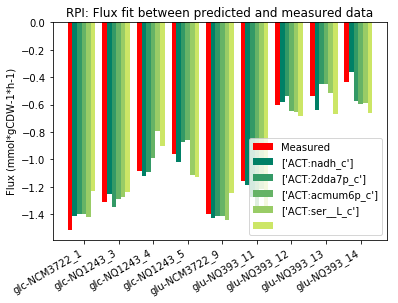

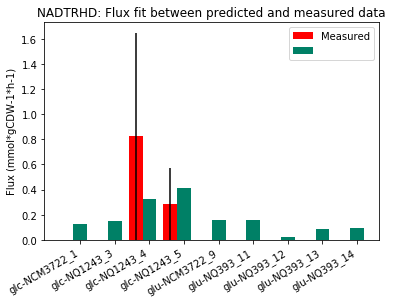

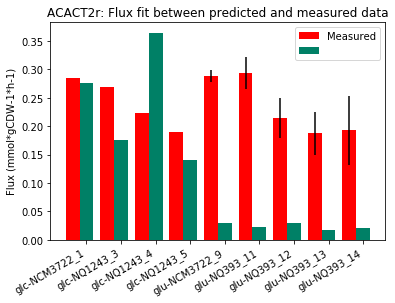

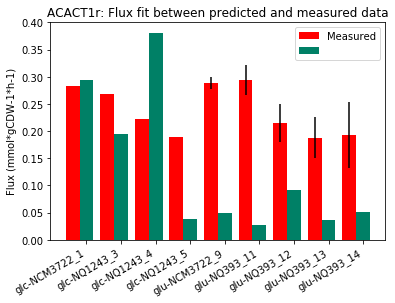

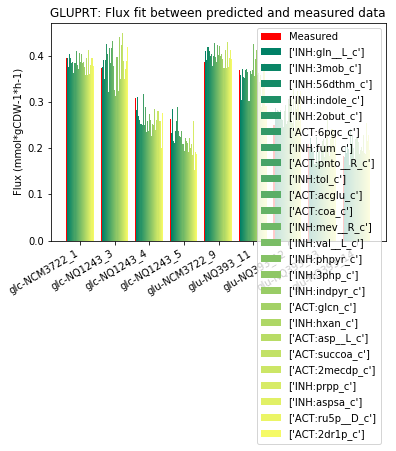

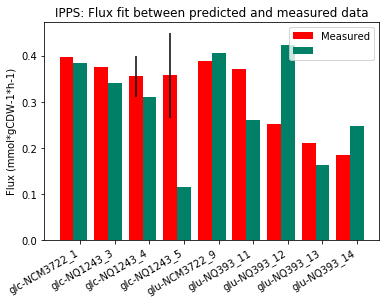

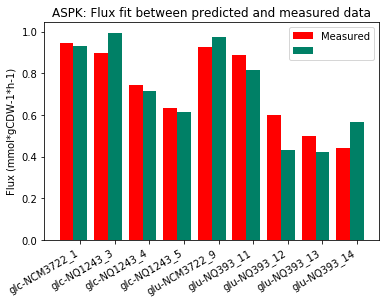

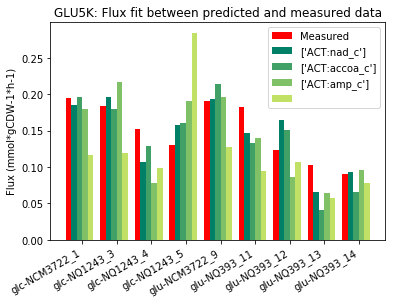

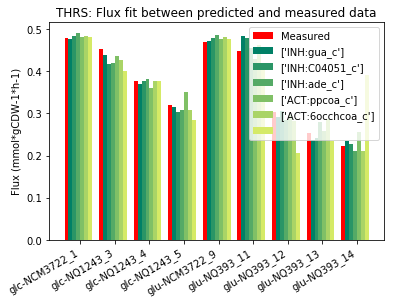

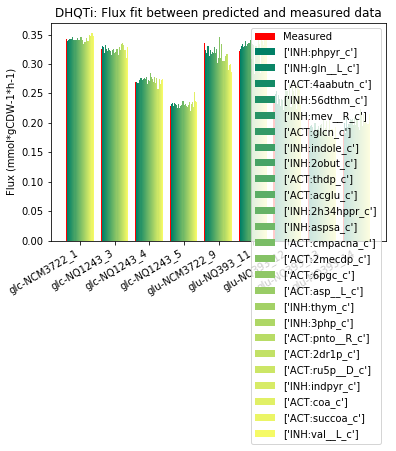

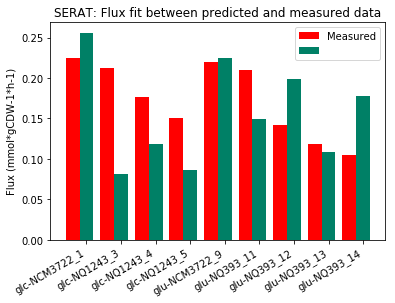

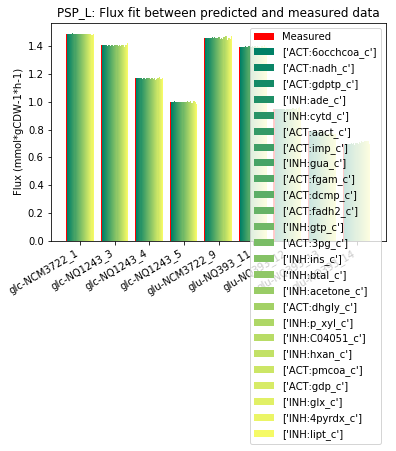

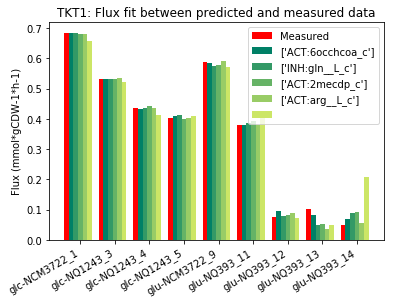

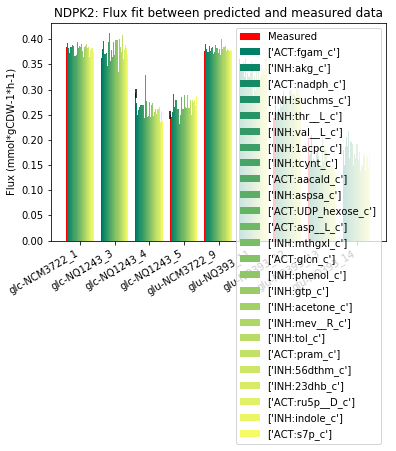

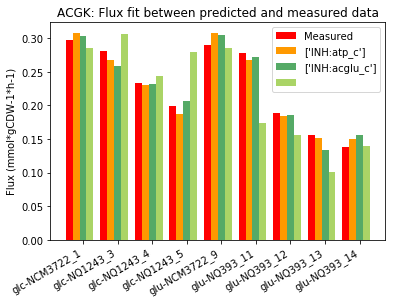

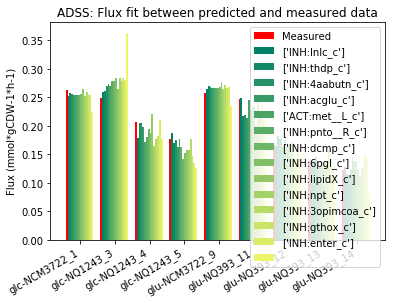

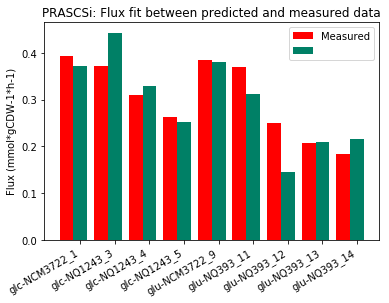

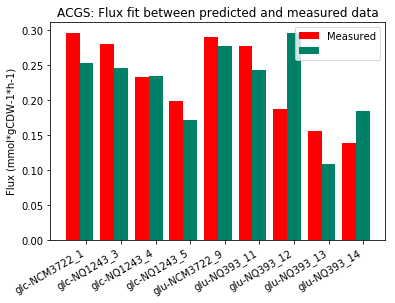

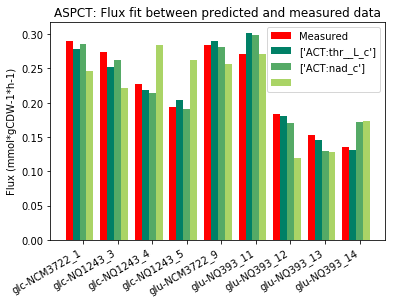

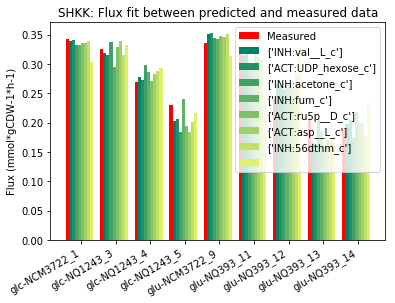

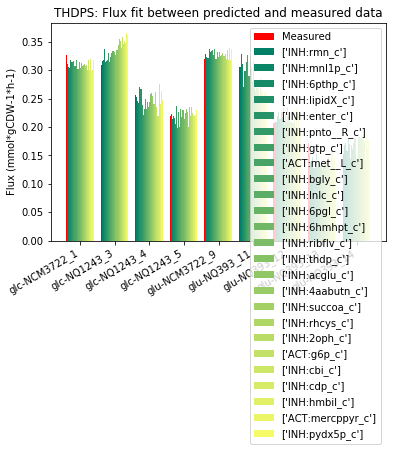

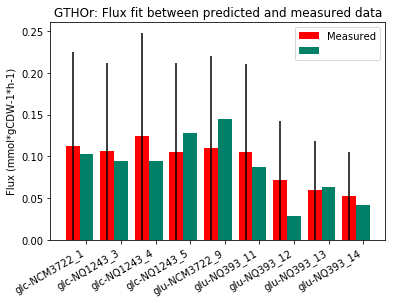

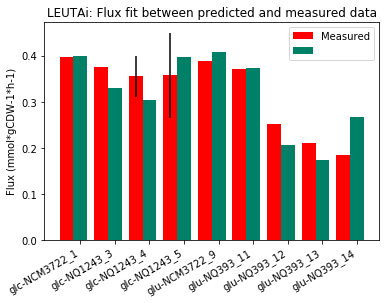

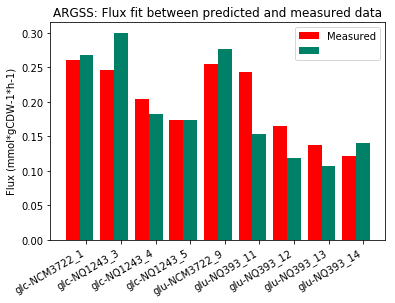

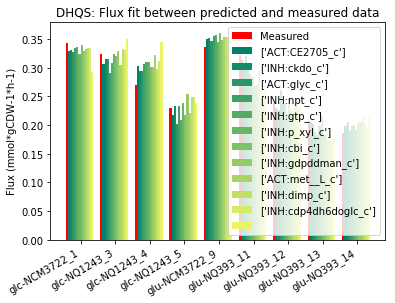

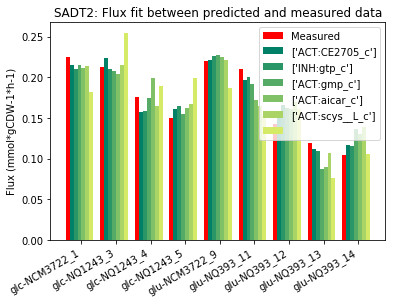

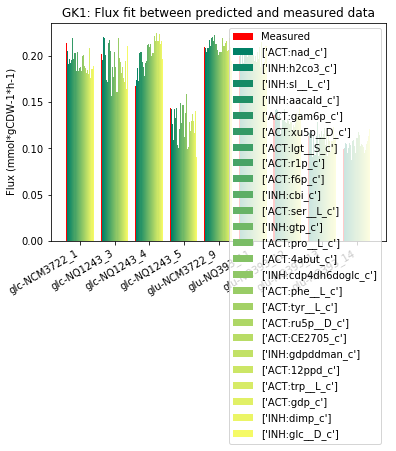

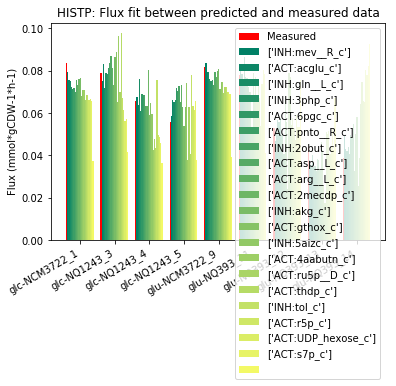

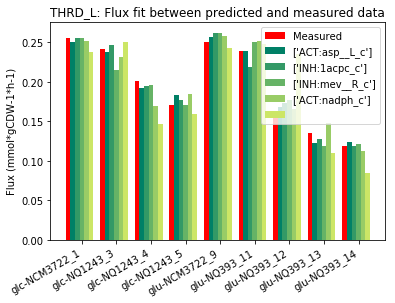

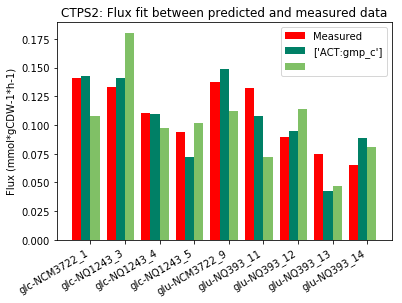

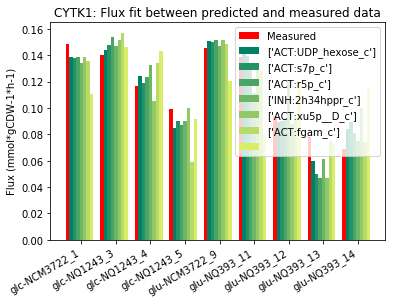

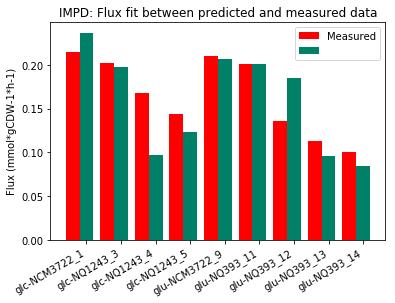

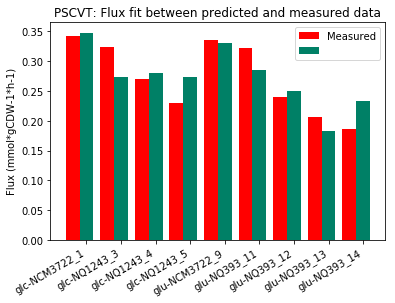

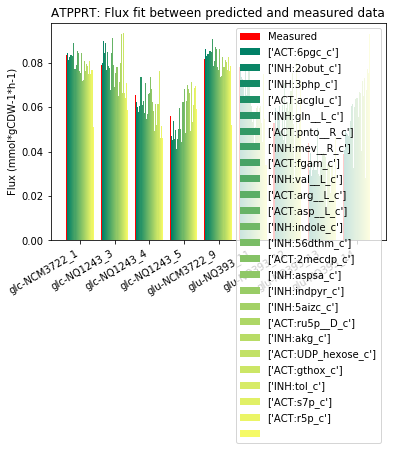

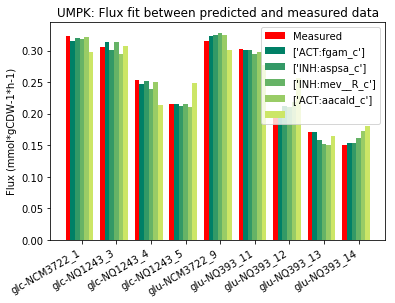

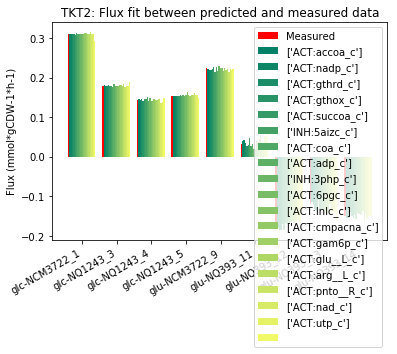

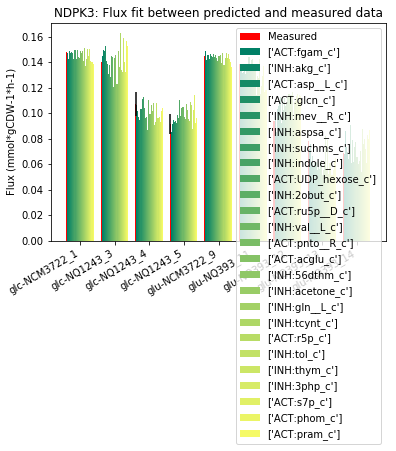

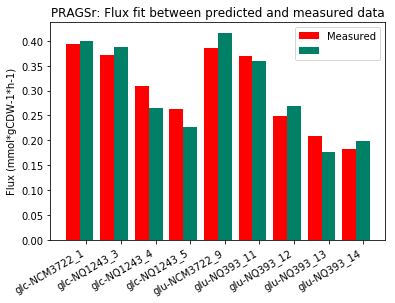

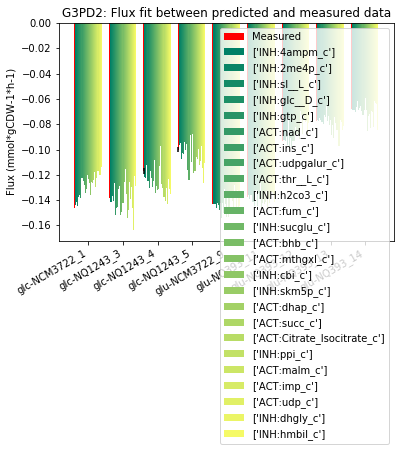

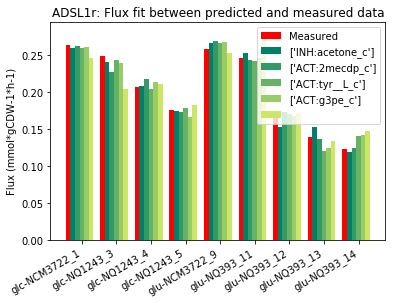

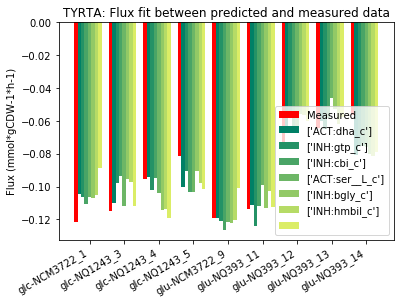

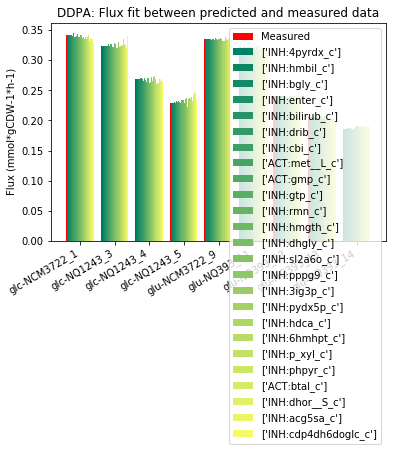

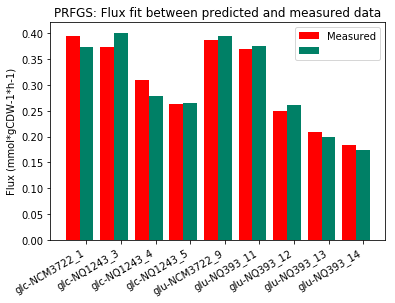

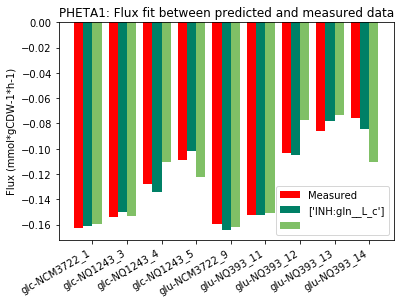

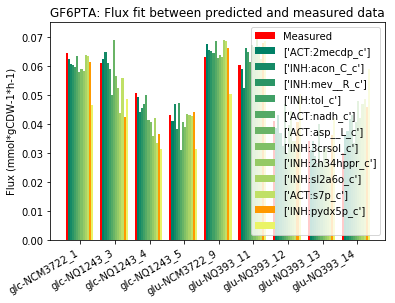

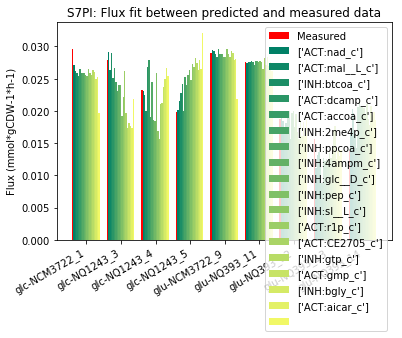

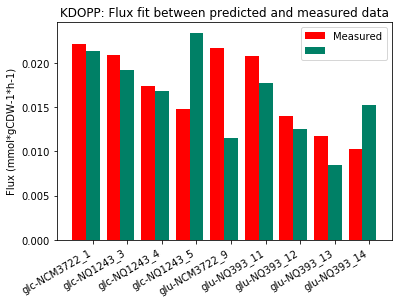

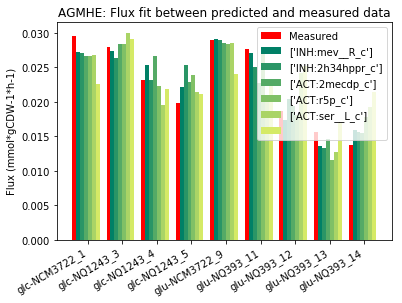

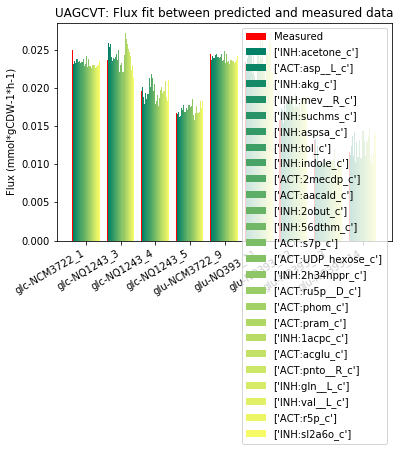

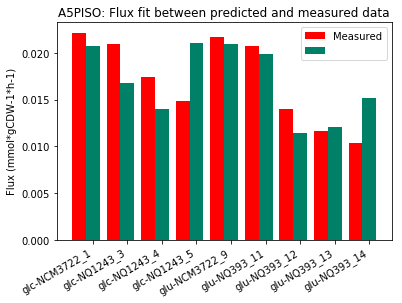

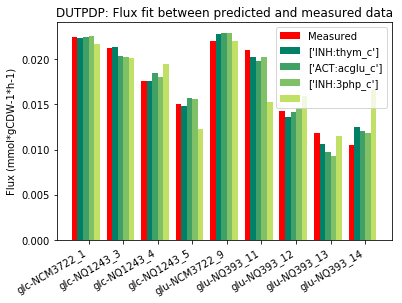

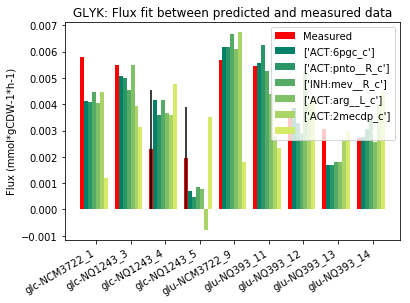

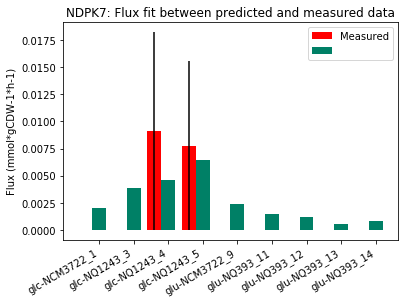

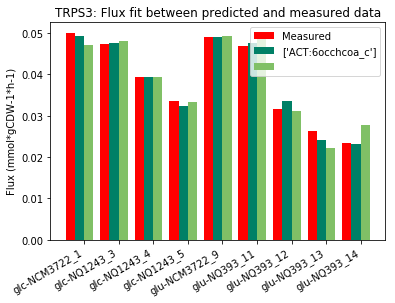

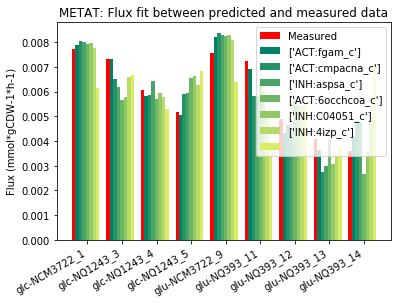

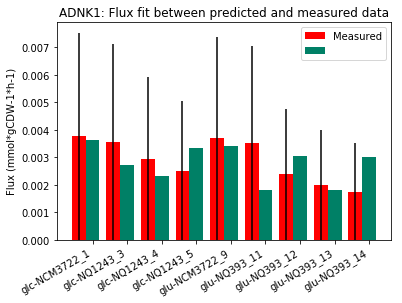

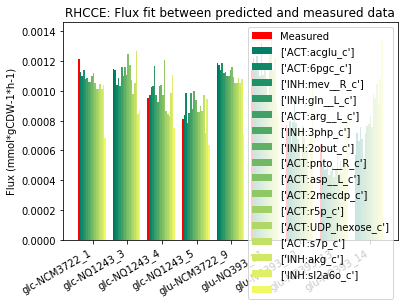

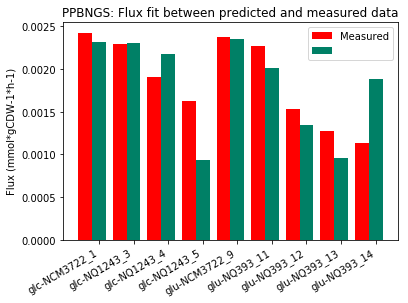

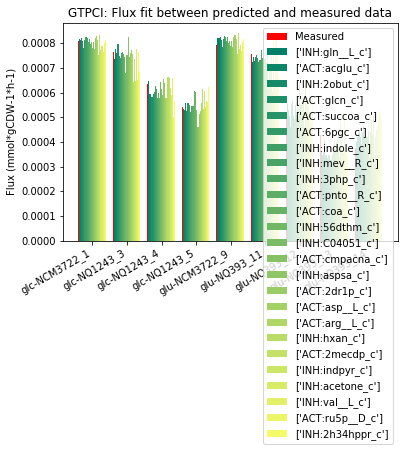

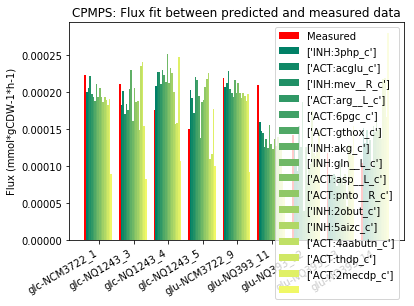

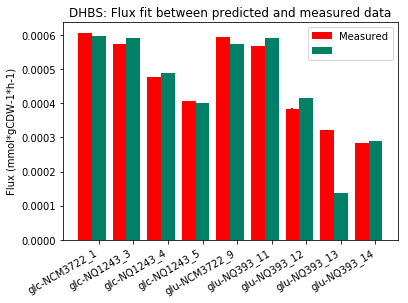

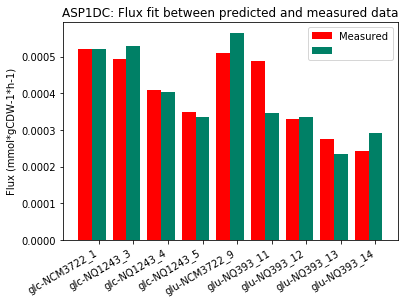

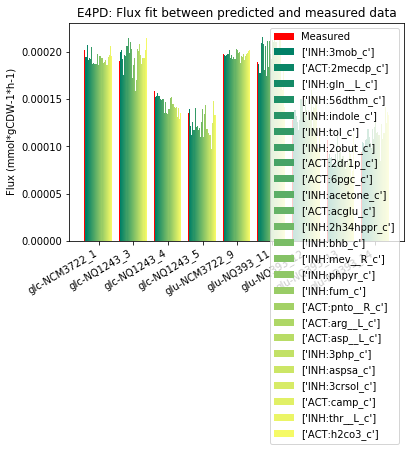

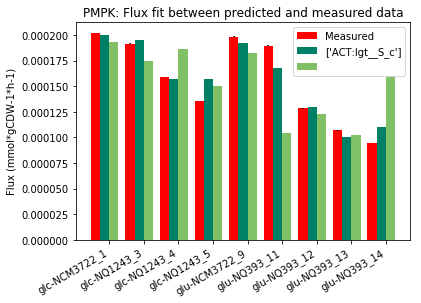

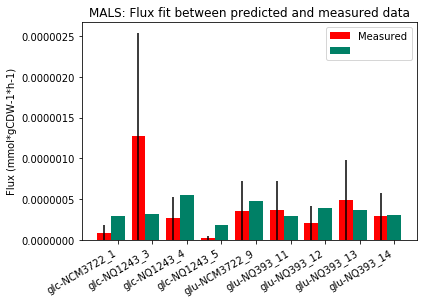

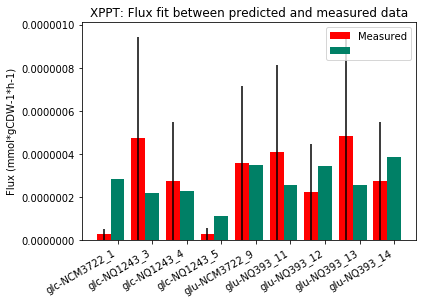

In [7]:
for rxn in list(reduced['rxn_id'].drop_duplicates()):
    arf.plot_fit(rxn,reduced,fullreg=reg_coli)

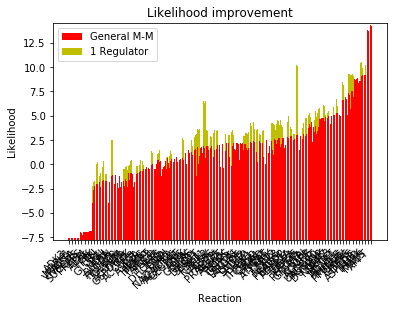

In [8]:
arf.plot_likelihood(reduced)